# Klasyfikacja probabilistyczna

## Naiwny klasyfikator Bayesa

Zapoznaj się z materiałami dostępnymi w [Przewodniku po pakiecie R](http://pbiecek.github.io/Przewodnik/Predykcja/naiwny_bayes.html) oraz [RPubs](https://rpubs.com/mmazurek/322903) oraz wykonaj samodzielnie w RStudio omawiane w nich przykłady. Następnie wykorzystaj naiwny klasyfikator Bayesa do rozwiązania problemu klasyfikacji wiadomości e-mail.

1. Zaimportuj (`read_csv`) i wyświetl (funkcja `head`) dane z pliku `email.csv`

In [ ]:
#install.packages("tidyverse")
library(tidyverse)

email <- read_csv("email.csv")

head(email)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 1681 Columns: 1103
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (1): message_label
dbl (1102): message_index, ability, abuse, accept, acceptance, accepted, acc...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


message_index,message_label,ability,abuse,accept,acceptance,accepted,access,account,accounting,⋯,worldwide,worth,write,writing,www,xls,xp,yahoo,yesterday,york
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
12,ham,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
21,ham,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
29,ham,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
43,ham,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
59,ham,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
68,ham,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


2. Przekształć zmienną `message_label` do typu kategorialnego.

In [ ]:
email$message_label <- as.factor(email$message_label)

3. Za pomocą funkcji `gather` przekształć zbiór danych tak, aby zamiast kolumny z częstością dla każdego wyrazu mieć dwie kolumny: jedną z wyrazem, drugą z częstością

In [ ]:
email %>%
  gather(word, count, -message_index, -message_label)


message_index,message_label,word,count
<dbl>,<fct>,<chr>,<dbl>
12,ham,ability,0
21,ham,ability,0
29,ham,ability,0
43,ham,ability,0
59,ham,ability,0
68,ham,ability,0
72,ham,ability,0
104,ham,ability,0
105,ham,ability,0


4. Pogrupuj dane według `word`, sumując zmienną `count` (sumę nazwij `occurence`) i posortuj wynik w malejącej kolejności `occurence`. Użyj funkcji `slice` do wyświetlenia tylko 10 wyrazów o najwyższej wartości `occurence`.

In [ ]:
#install.packages("tidyr")
library(tidyr)

top_words <- email %>%
  gather(word, word_count, -message_index, -message_label) %>%
  group_by(word) %>%
  summarize(occurence = sum(as.numeric(word_count))) %>%
  arrange(desc(occurence)) %>%
  slice(1:10)

print(top_words)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# A tibble: 10 × 2
   word        occurence
   <chr>           <dbl>
 1 enron             382
 2 time              366
 3 http              284
 4 information       279
 5 message           266
 6 email             251
 7 mail              250
 8 business          216
 9 company           212
10 day               208


5. W podobny sposób sprawdź, jakie 10 wyrazów pojawia się w zwykłych wiadomościach, a jakie w wiadomościach spam.

In [ ]:
top_words_ham <- email %>%
  filter(message_label == "ham") %>%
  gather(word, word_count, -message_index, -message_label) %>%
  group_by(word) %>%
  summarize(occurence = sum(as.numeric(word_count))) %>%
  arrange(desc(occurence)) %>%
  slice(1:10)

print(top_words_ham)


top_words_spam <- email %>%
  filter(message_label == "spam") %>%
  gather(word, word_count, -message_index, -message_label) %>%
  group_by(word) %>%
  summarize(occurence = sum(as.numeric(word_count))) %>%
  arrange(desc(occurence)) %>%
  slice(1:10)

print(top_words_spam)

# A tibble: 10 × 2
   word      occurence
   <chr>         <dbl>
 1 enron           382
 2 pmto            191
 3 time            185
 4 message         169
 5 ect             165
 6 forwarded       162
 7 questions       160
 8 hou             153
 9 amto            147
10 call            145
# A tibble: 10 × 2
   word        occurence
   <chr>           <dbl>
 1 http              233
 2 time              181
 3 email             171
 4 information       148
 5 money             147
 6 company           141
 7 mail              137
 8 www               123
 9 free              121
10 business          120


6. Podziel dane na zbiory treningowy i testowy, stosując proporcję 75:25. Następnie wyświetl rozkłady klas dla wszystkich zbiorów danych (`prop.table`).

In [ ]:
#install.packages("caret")
library(caret)

set.seed(123)
trainIndex <- createDataPartition(email$message_label, p = .75, list = FALSE)
email_train <- email[trainIndex,]
email_test <- email[-trainIndex,]

print(prop.table(table(email_train$message_label)))
print(prop.table(table(email_test$message_label)))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift





      ham      spam 
0.4920761 0.5079239 

      ham      spam 
0.4916468 0.5083532 


7. Zbuduj naiwny model Bayesa za pomocą funkcji `naiveBayes`.

In [ ]:
library(e1071)

email_mod <-
  naiveBayes(message_label ~ . - message_index,
             data = email_train,
             laplace = 1)

8. Oceń jak dobrze model radzi sobie z przewidywaniem, czy email w danych testowych to spam, czy zwykła wiadomość (funkcja `predict`, a następnie obliczenie dokładności predykcji modelu w oparciu o wartości macierzy pomyłek).

In [ ]:
predictions <- predict(email_mod, email_test)

conf_matrix <- table(predictions, email_test$message_label)
print(conf_matrix)

accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Dokładność modelu: ", round(accuracy, 2)))

           
predictions ham spam
       ham  196   49
       spam  10  164
[1] "Dokładność modelu:  0.86"


9. Odpowiedz na pytanie: w jaki sposób moglibyśmy zwiększyć dokładność predykcji?

In [ ]:
# Zbalansowanie zbioru danych - oversampling lub undersampling dla klas ham i spam
# Zwiększenie zbiru danych
# Usuwanie stop-wordów oraz stemming i lematyzacja

## Sieć Bayesa

Jednym z najpopularniejszych pakietów R dla sieci Bayesa jest `bnlearn`. Zawiera on wiele różnych algorytmów uczenia SB i wnioskowania oraz zestawy danych.

### Przykład

Jako przykład wykorzystamy zbiór `coronary` z pakietu `bnlearn`, zawierający prawdopodobne czynniki ryzyka zakrzepicy. Zmienne:

- Smoking - palenie (poziomy: 'no', 'yes')
- M. Work - wytężona praca umysłowa (poziomy: 'no', 'yes')
- P. Work - wytężona praca fizyczna (poziomy: 'no', 'yes')
- Pressure - ciśnienie skurczowe krwi (poziomy: '<140', '>140')
- Proteins - stosunek lipoprotein alfa i beta (poziomy: '<3', '>3')
- Family - występowanie choroby niedokrwiennej w rodzinie (poziomy: 'neg', 'pos')

In [ ]:
#install.packages("bnlearn")
# załadowanie danych
library(bnlearn)
data(coronary)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘bnlearn’


The following object is masked from ‘package:e1071’:

    impute




Utworzenie i wizualizacja sieci Bayesa

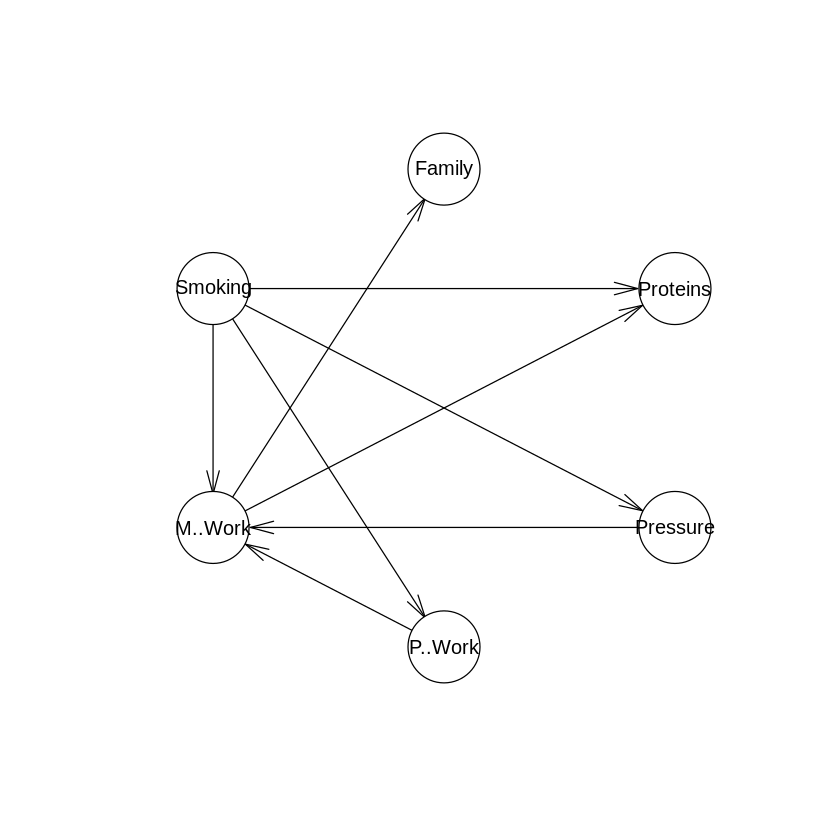

In [ ]:
bn_df <- data.frame(coronary)
res <- hc(bn_df)
plot(res)

Nie wszystkie powstałe powiązania mają sens (np. `Family` jako warunek `M. Work`). Modyfikacja struktury sieci:

In [ ]:
res$arcs <- res$arcs[-which((res$arcs[,'from'] == "M..Work" &
                               res$arcs[,'to'] == "Family")),]

Następnym krokiem po zapoznaniu się ze strukturą sieci, jest znalezienie tablic prawdopodobieństwa warunkowego (CPT) w każdym węźle. Służy do tego funkcja `bn.fit`. Następnie za pomocą funkcji `print` można podejrzeć co znajduje się w węźle `Protein`:

In [ ]:
fittedbn <- bn.fit(res, data = bn_df)
print(fittedbn$Proteins)


  Parameters of node Proteins (multinomial distribution)

Conditional probability table:
 
, , M..Work = no

        Smoking
Proteins        no       yes
      <3 0.6685824 0.6167763
      >3 0.3314176 0.3832237

, , M..Work = yes

        Smoking
Proteins        no       yes
      <3 0.5671982 0.3235294
      >3 0.4328018 0.6764706



Tak przygotowaną sieć możemy wykorzystać do wnioskowania. Na przykład móżemy znaleźć odpowiedź na pytanie: Jakie jest prawdopodobieństwo, że osoba niepaląca z ciśnieniem >140, będzie miała poziom białek <3?

In [ ]:
cpquery(fittedbn, event = (Proteins=="<3"), evidence = ((Smoking=="no") &
                                                          (Pressure == ">140")))

[1] 0.6006494